In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
import pandas as pd


data = pd.read_csv('/drive/My Drive/formatted_data.csv')

In [17]:
import nltk
from nltk.corpus import stopwords
import string
import re

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# Define the preprocessing function
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [19]:
data['text'] = data['text'].apply(preprocess_text)


In [20]:
text_data=data['text']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag of Words
bow_vectorizer = CountVectorizer()
bow_features = bow_vectorizer.fit_transform(text_data)


In [22]:
print(bow_vectorizer.get_feature_names_out()[:5])

['aaaaaand' 'abbey' 'ability' 'able' 'abroad']


In [23]:
# Feature names
bow_feature_names = bow_vectorizer.get_feature_names_out()

# Transformed data
bow_transformed_data = bow_features.toarray()

In [28]:
print(bow_features.toarray()[:5])
print(sum(bow_features.toarray()[0]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
6


In [34]:
bow_feature_names
print(len(bow_feature_names))

2165


In [33]:
bow_transformed_data
print(len(bow_transformed_data))


800


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(text_data)

In [36]:
# Feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Transformed data
tfidf_transformed_data = tfidf_features.toarray()

In [37]:
print(tfidf_vectorizer.get_feature_names_out())

['aaaaaand' 'abbey' 'ability' ... 'zipper' 'zits' 'zone']


In [38]:
print(tfidf_features.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [40]:
# For BoW
bow_feature_names = bow_vectorizer.get_feature_names_out()

# For TF-IDF
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()


In [41]:
# For BoW
bow_transformed_data = bow_features.toarray()

# For TF-IDF
tfidf_transformed_data = tfidf_features.toarray()


In [42]:
print("BoW Feature Names:")
print(bow_feature_names)

BoW Feature Names:
['aaaaaand' 'abbey' 'ability' ... 'zipper' 'zits' 'zone']


In [43]:
print("\nTF-IDF Feature Names:")
print(tfidf_feature_names)



TF-IDF Feature Names:
['aaaaaand' 'abbey' 'ability' ... 'zipper' 'zits' 'zone']


In [48]:
chunk_size = 5
for i in range(0, len(bow_feature_names), chunk_size):
    print((bow_feature_names[i:i+chunk_size]))


['aaaaaand' 'abbey' 'ability' 'able' 'abroad']
['abs' 'abused' 'accepted' 'accident' 'accidentally']
['according' 'account' 'accuse' 'accuses' 'acknowledge']
['acoustic' 'acquit' 'act' 'acting' 'active']
['acts' 'actua' 'actual' 'actually' 'acupuncture']
['ad' 'admit' 'adn' 'advance' 'advertise']
['advice' 'affleck' 'afford' 'africa' 'againeither']
['age' 'agenda' 'ago' 'agreed' 'ahahahah']
['ains' 'aint' 'air' 'aircraft' 'airplane']
['alarm' 'alcohol' 'aliens' 'alike' 'allowed']
['almost' 'alone' 'alphabet' 'already' 'alright']
['also' 'always' 'amateurs' 'amazon' 'america']
['amount' 'amy' 'anabolic' 'anakin' 'anda']
['andry' 'angle' 'angry' 'animals' 'annual']
['another' 'answer' 'answers' 'antisocial' 'antivaxxer']
['antivaxxers' 'anymore' 'anyone' 'anything' 'anyway']
['anyways' 'anywhere' 'aparkment' 'apart' 'apologize']
['app' 'apparently' 'apple' 'applicator' 'apply']
['approach' 'april' 'aquatic' 'araise' 'area']
['arent' 'argentina' 'argue' 'arguing' 'argument']
['arguments' 

In [51]:

for i in range(0, len(bow_transformed_data)):
    print((bow_transformed_data))


Streaming output truncated to the last 5000 lines.
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 

In [50]:
chunk_size = 5
for i in range(0, len(tfidf_feature_names), chunk_size):
    print(tfidf_feature_names[i:i+chunk_size])


['aaaaaand' 'abbey' 'ability' 'able' 'abroad']
['abs' 'abused' 'accepted' 'accident' 'accidentally']
['according' 'account' 'accuse' 'accuses' 'acknowledge']
['acoustic' 'acquit' 'act' 'acting' 'active']
['acts' 'actua' 'actual' 'actually' 'acupuncture']
['ad' 'admit' 'adn' 'advance' 'advertise']
['advice' 'affleck' 'afford' 'africa' 'againeither']
['age' 'agenda' 'ago' 'agreed' 'ahahahah']
['ains' 'aint' 'air' 'aircraft' 'airplane']
['alarm' 'alcohol' 'aliens' 'alike' 'allowed']
['almost' 'alone' 'alphabet' 'already' 'alright']
['also' 'always' 'amateurs' 'amazon' 'america']
['amount' 'amy' 'anabolic' 'anakin' 'anda']
['andry' 'angle' 'angry' 'animals' 'annual']
['another' 'answer' 'answers' 'antisocial' 'antivaxxer']
['antivaxxers' 'anymore' 'anyone' 'anything' 'anyway']
['anyways' 'anywhere' 'aparkment' 'apart' 'apologize']
['app' 'apparently' 'apple' 'applicator' 'apply']
['approach' 'april' 'aquatic' 'araise' 'area']
['arent' 'argentina' 'argue' 'arguing' 'argument']
['arguments' 

In [53]:

for i in range(0, len(tfidf_transformed_data)):
    print((tfidf_transformed_data))

Streaming output truncated to the last 5000 lines.
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ..

In [57]:
import spacy

In [58]:
nlp=spacy.load('en_core_web_sm')

In [59]:
nlp.tokenizer.rules = {key: value for key, value in nlp.tokenizer.rules.items() if "'" not in key and "’" not in key and "‘" not in key}

In [54]:
num_miso_de=0 #number of observations which are classified as misogynistic by domain experts
num_non_miso_de=0#number of observations which are classified as non misogynistic by domain experts
num_miso_cs=0#number of observations classified as misogynistic by crowd sourcing
num_non_miso_cs=0 #number of observations classified as non misogynistic by crowd sourcing

In [61]:
stop_words=set(stopwords.words('english'))

In [55]:
list_tokens_miso_de=[] #collecting all lemmas in to this list where the text is classified as misogynistic by domain experts
list_tokens_non_miso_de=[]#collecting all lemmas in to this list where the text is classified as non misogynistic by domain experts
list_tokens_miso_cs=[]#collecting all lemmas in to this list where the text is classified as misogynistic by crowd sourcing
list_tokens_non_miso_cs=[]#collecting all lemmas in to this list where the text is classified as non misogynistic by crowd sourcing

In [62]:
for index in data.index:
  curr_text=data['text'][index].strip().lower()
  curr_text=curr_text.replace('\t','')
  x=nlp(curr_text)
  non_stop_words=[]
  for y in x:
    if y.text not in stop_words and y.pos_!='PUNCT':
      non_stop_words.append(y.lemma_)
  if data['misogynisticCS'][index]==0:
    num_non_miso_cs+=1
    list_tokens_non_miso_cs.extend(non_stop_words)
  elif data['misogynisticCS'][index]==1:
    num_miso_cs+=1
    list_tokens_miso_cs.extend(non_stop_words)
  if data['misogynisticDE'][index]==0:
    num_non_miso_de+=1
    list_tokens_non_miso_de.extend(non_stop_words)
  elif data['misogynisticDE'][index]==1:
    num_miso_de+=1
    list_tokens_miso_de.extend(non_stop_words)

In [63]:
num_miso_de


400

In [64]:
num_miso_cs

369

In [65]:
words_miso_de=''
for x in list_tokens_miso_de:
  words_miso_de+=x
  words_miso_de+=' '

In [66]:
from wordcloud import WordCloud

In [67]:
word_cloud_miso_de=WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(words_miso_de)

In [68]:
import matplotlib.pyplot as plt

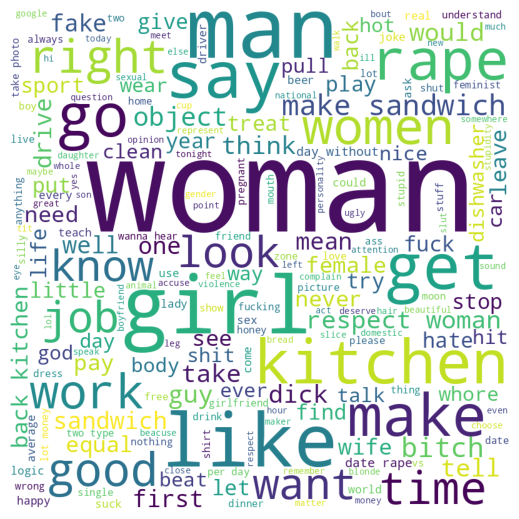

In [69]:
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(word_cloud_miso_de)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [70]:
import re

In [74]:
#first here I want to check in general if there is skewed vocabulary across the documents to see if bag of words will be a good approach
#collecting unique lemmas and checking in what percentage of 800 observations they are present
unique_lemmas=set()
for index in data.index:
    text=data['text'][index].replace('\t','').strip().lower()
    doc=nlp(text)
    for token in doc:
        if token.text not in stop_words and token.pos_!='PUNCT' and token.pos_!='NUM' and token.pos_!='SYM' and not(any(char.isdigit() for char in token.text)):
            unique_lemmas.add(token.lemma_)


In [90]:
#finding here in what percentage of documents each lemma is present
lemmas_freq=dict()
for index in data.index:

    text=data['text'][index].replace('\t','').strip().lower()
    text=re.sub(r'@[a-zA-Z0-9.-]+', '', text)
    text = re.sub(r'\b[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,4}\b', '', text)
    text = re.sub(r'([0-1]?[0-9]|2[0-3]):[0-5][0-9](\s+\b(am|pm)\b)?\s+', '', text)
    text = re.sub(r'(jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)\s+([0-2][0-9]|3[0-1]),?\s+(\d{4})', '', text)
    doc=nlp(text)
    unique_lemmas_curr=set()
    for token in doc:
        if token.text not in stop_words and token.lemma_ in unique_lemmas:
            unique_lemmas_curr.add(token.lemma_)
    for lemma in unique_lemmas_curr:
        if lemma in lemmas_freq:
            lemmas_freq[lemma]=lemmas_freq[lemma]+1
        else:
            lemmas_freq[lemma]=1

In [91]:
from collections import Counter

In [92]:
len(lemmas_freq)

1818

In [93]:
#for frequency
for x in lemmas_freq:
    lemmas_freq[x]=(lemmas_freq[x])/800
#for percentage
percentages=[]
for x in lemmas_freq:
    percentages.append(lemmas_freq[x])

counter_percen=Counter(percentages)


In [95]:
counter_percen

Counter({0.01: 14,
         0.19875: 1,
         0.015: 13,
         0.0075: 38,
         0.06: 1,
         0.00625: 43,
         0.005: 59,
         0.145: 1,
         0.00125: 1158,
         0.0425: 1,
         0.05875: 2,
         0.0025: 278,
         0.02875: 3,
         0.00875: 18,
         0.00375: 131,
         0.01875: 2,
         0.01375: 3,
         0.02375: 2,
         0.03125: 2,
         0.02: 2,
         0.0575: 1,
         0.03375: 1,
         0.02625: 1,
         0.05125: 1,
         0.0125: 9,
         0.07: 1,
         0.0175: 5,
         0.0275: 2,
         0.065: 1,
         0.03: 3,
         0.01625: 6,
         0.01125: 12,
         0.025: 1,
         0.03875: 1,
         0.0225: 1})

In [96]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models

In [97]:
resnet152 = models.resnet152(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:03<00:00, 73.9MB/s]


In [98]:
from PIL import Image
from torchvision import transforms
from torchvision.transforms import functional
from torchvision.transforms.functional import pil_to_tensor

In [107]:
preprocess = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

preprocess2 = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
    transforms.Lambda(transforms.Lambda(lambda x: x.repeat(3,1,1))),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

])

In [ ]:
for index in df.index:
    image_id=df['memeID'][index]
    print(image_id)
    input_image=Image.open("drive/My Drive/Datasets/project_images/res_"+image_id+".jpg")
    if pil_to_tensor(input_image).shape[0]==3:
        input_image=preprocess(input_image)
    else:
        input_image=preprocess2(input_image)
    batch_all[image_id]=input_image

